In [42]:
from fbprophet import Prophet
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [43]:
#import dataframes
path1= '/Users/jacklobe/lighthouse/Final/Ruter_Nov2019_Sep2020.csv'
path2= '/Users/jacklobe/lighthouse/Final/StarTran_Apr2020_Sep2020.csv'
path3= '/Users/jacklobe/lighthouse/Final/DART_Jan2019_Sep2020.csv'
path4= '/Users/jacklobe/lighthouse/Final/SouthwestTransit_Aug2019_Sep2020.csv'
#################
rueter=pd.read_csv(path1)
StarTran=pd.read_csv(path2)
dart=pd.read_csv(path3)
swtran=pd.read_csv(path4)

In [44]:
def convertcentral(data):
    #converts central timezones to pandas datetime and converts it to central time
    data['requestedPickupTs'] = pd.DatetimeIndex(pd.to_datetime(data['requestedPickupTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)
    data['requestedDropoffTs'] = pd.DatetimeIndex(pd.to_datetime(data['requestedDropoffTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)
    return data

In [45]:
convertcentral(dart)
convertcentral(StarTran)
convertcentral(swtran)

,requestedPickupTs,requestedDropoffTs,requestedPickupTsTimestamp,requestedDropoffTsTimestamp,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,serviceId,status,statusChanges,travelDistance,travelDuration,endpoint
0,2019-08-29 19:58:55,2019-08-29 20:06:53,2019-08-29T19:58:55Z,2019-08-29T20:06:53Z,44.796685,-93.586401,44.832909,-93.568735,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567108736, ""status"": ""processing""}, {...",4895,478,nextAvailable
1,2019-08-29 20:01:20,2019-08-29 20:10:29,2019-08-29T20:01:20Z,2019-08-29T20:10:29Z,44.853806,-93.419128,44.825236,-93.427182,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567108880, ""status"": ""processing""}, {...",4310,549,nextAvailable
2,2019-08-29 20:06:58,2019-08-29 20:22:29,2019-08-29T20:06:58Z,2019-08-29T20:22:29Z,44.862814,-93.522557,44.817545,-93.617486,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567109218, ""status"": ""processing""}, {...",11385,931,nextAvailable
3,2019-08-29 20:09:10,2019-08-29 20:21:12,2019-08-29T20:09:10Z,2019-08-29T20:21:12Z,44.851744,-93.588388,44.806882,-93.590702,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567109350, ""status"": ""processing""}, {...",8422,722,nextAvailable
4,2019-08-29 20:11:16,2019-08-29 20:32:33,2019-08-29T20:11:16Z,2019-08-29T20:32:33Z,44.851223,-93.421839,44.793831,-93.590504,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567109476, ""status"": ""processing""}, {...",21483,1277,nextAvailable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82114,2019-08-29 19:32:39,2019-08-29 19:48:25,2019-08-29T19:32:39Z,2019-08-29T19:48:25Z,44.876525,-93.408421,44.864018,-93.573141,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567107159, ""status"": ""processing""}, {...",16110,946,nextAvailable
82115,2019-08-29 19:37:53,2019-08-29 19:49:17,2019-08-29T19:37:53Z,2019-08-29T19:49:17Z,44.757576,-93.638411,44.779675,-93.651632,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567107475, ""status"": ""processing""}, {...",4186,684,nextAvailable
82116,2019-08-29 19:38:42,2019-08-29 19:45:35,2019-08-29T19:38:42Z,2019-08-29T19:45:35Z,44.835539,-93.443745,44.860004,-93.443051,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567107522, ""status"": ""processing""}, {...",4257,413,nextAvailable
82117,2019-08-29 19:46:44,2019-08-29 19:58:26,2019-08-29T19:46:44Z,2019-08-29T19:58:26Z,44.845743,-93.423709,44.872477,-93.490840,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567108004, ""status"": ""processing""}, {...",7848,702,nextAvailable


In [46]:
rueter['requestedPickupTs'] = pd.DatetimeIndex(pd.to_datetime(rueter['requestedPickupTs'],unit='s')).tz_localize('UTC').tz_convert('Europe/Oslo').tz_convert(None)

In [47]:
#check if geofense demand varies greatly
StarTran.groupby(StarTran.serviceId).count()
dart.groupby(dart.serviceId).count().sort_values(by='requestedPickupLongitude',ascending=False)
#swtran.groupby(swtran.serviceId).count()#majority of demand(76752/81000 come from single geofense)
#rueter.groupby(rueter.serviceId).count()#realistically dataset is too small to subset into geofenses for forecasting
#make sub dataframes with each geofense 


,requestedPickupTs,requestedDropoffTs,requestedPickupTsTimestamp,requestedDropoffTsTimestamp,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,status,statusChanges,travelDistance,travelDuration,endpoint
serviceId,,,,,,,,,,,,,
d0a57efd-e2cc-4a03-9ae6-fef917a74b76,60606,60606,60606,60606,60606,60606,60606,60606,60606,60606,60606,60606,60606
e40490b6-1d87-4dec-8b23-92632915008e,40482,40482,40482,40482,40482,40482,40482,40482,40482,40482,40482,40482,40482
9e20241d-9318-4ccc-842a-9675855336d6,35409,35409,35409,35409,35409,35409,35409,35409,35409,35409,35409,35409,35409
506997d2-b163-4b46-b977-b47f8fb0c4ff,29259,29259,29259,29259,29259,29259,29259,29259,29259,29259,29259,29259,29259
4ee9b67e-98c2-4191-a4f7-efa0b32f48c1,23227,23227,23227,23227,23227,23227,23227,23227,23227,23227,23227,23227,23227
671bf16c-0ff1-4841-9795-1644d57bd56c,14924,14924,14924,14924,14924,14924,14924,14924,14924,14924,14924,14924,14924
907a17e6-9da5-4c47-9044-24b7a7c00b4d,14631,14631,14631,14631,14631,14631,14631,14631,14631,14631,14631,14631,14631
d41799c0-2f24-4a22-a5d4-6b776aa7c949,11378,11378,11378,11378,11378,11378,11378,11378,11378,11378,11378,11378,11378
1e995f05-cd00-4f9c-86a7-84e8867ee42d,10920,10920,10920,10920,10920,10920,10920,10920,10920,10920,10920,10920,10920


In [48]:
#sort by time


In [49]:
#test for staionarity 

In [50]:
dart

,requestedPickupTs,requestedDropoffTs,requestedPickupTsTimestamp,requestedDropoffTsTimestamp,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,serviceId,status,statusChanges,travelDistance,travelDuration,endpoint
0,2020-04-21 17:34:19,2020-04-21 17:47:10,2020-04-21T10:34:19-07:00,2020-04-21T10:47:10-07:00,32.931741,-96.525914,32.904062,-96.564146,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,"[{""ts"": 1587490162, ""status"": ""processing""}, {...",7325,771,nextAvailable
1,2020-04-20 20:15:20,2020-04-20 20:27:54,2020-04-20T13:15:20-07:00,2020-04-20T13:27:54-07:00,32.890332,-96.531593,32.915535,-96.520184,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,"[{""ts"": 1587413560, ""status"": ""processing""}, {...",5349,754,nextAvailable
2,2020-04-22 18:50:00,2020-04-22 19:00:23,2020-04-22T11:50:00-07:00,2020-04-22T12:00:23-07:00,32.718280,-96.684454,32.670403,-96.616116,4ee9b67e-98c2-4191-a4f7-efa0b32f48c1,cancelled,"[{""ts"": 1587577965, ""status"": ""processing""}, {...",9949,623,scheduled
3,2020-04-22 11:40:35,2020-04-22 11:49:38,2020-04-22T04:40:35-07:00,2020-04-22T04:49:38-07:00,32.661913,-96.734318,32.654408,-96.801775,506997d2-b163-4b46-b977-b47f8fb0c4ff,cancelled,"[{""ts"": 1587554479, ""status"": ""processing""}, {...",9305,543,nextAvailable
4,2019-08-07 11:48:47,2019-08-07 11:59:16,2019-08-07T04:48:47-07:00,2019-08-07T04:59:16-07:00,33.073095,-96.726008,33.033556,-96.701109,e40490b6-1d87-4dec-8b23-92632915008e,completed,"[{""ts"": 1565177897, ""status"": ""processing""}, {...",7198,629,nextAvailable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272039,2020-04-21 17:29:32,2020-04-21 17:35:41,2020-04-21T10:29:32-07:00,2020-04-21T10:35:41-07:00,33.047400,-96.710740,33.033573,-96.701112,e40490b6-1d87-4dec-8b23-92632915008e,completed,"[{""ts"": 1587489917, ""status"": ""processing""}, {...",3224,369,nextAvailable
272040,2019-08-28 10:20:10,2019-08-28 10:31:08,2019-08-28T03:20:10-07:00,2019-08-28T03:31:08-07:00,32.660572,-96.624212,32.718598,-96.685063,4ee9b67e-98c2-4191-a4f7-efa0b32f48c1,completed,"[{""ts"": 1566746967, ""status"": ""processing""}, {...",12887,658,scheduled
272041,2019-08-05 17:44:49,2019-08-05 17:49:00,2019-08-05T10:44:49-07:00,2019-08-05T10:49:00-07:00,32.869173,-96.772825,32.883305,-96.764925,671bf16c-0ff1-4841-9795-1644d57bd56c,cancelled,"[{""ts"": 1565026322, ""status"": ""processing""}, {...",2129,251,nextAvailable
272042,2019-09-23 10:00:00,2019-09-23 10:08:18,2019-09-23T03:00:00-07:00,2019-09-23T03:08:18-07:00,32.661913,-96.734318,32.654408,-96.801775,506997d2-b163-4b46-b977-b47f8fb0c4ff,completed,"[{""ts"": 1569230952, ""status"": ""processing""}, {...",9305,498,scheduled


In [51]:
#facebook prophet function
def fit_predict_model(data, interval_width = 0.99, changepoint_range = 0.8):
    df=data.groupby(pd.Grouper(key='requestedPickupTs',freq='d')).count()
    df=pd.DataFrame(df['requestedDropoffTs'])
    df=df.reset_index(drop=False)
    df = df.rename(columns={'requestedPickupTs': 'ds', 'requestedDropoffTs': 'y'})
    m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(df)
    forecast = m.predict(df)
    forecast['fact'] = df['y'].reset_index(drop = True)
    return forecast
    
pred = fit_predict_model(dart)

In [52]:
def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted

pred = detect_anomalies(pred)

In [53]:
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='Rides'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='Rides'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)
              
plot_anomalies(pred)

alt.LayerChart(...)

In [54]:
def fitmodel(data):
    df=data.groupby(pd.Grouper(key='requestedPickupTs',freq='d')).count()
    df=pd.DataFrame(df['requestedDropoffTs'])
    df=df.reset_index(drop=False)
    df = df.rename(columns={'requestedPickupTs': 'ds', 'requestedDropoffTs': 'y'})
    return df

In [55]:
withcovid=Prophet()
withcovid.fit(fitmodel(dart))
future_rides=withcovid.make_future_dataframe(periods=365, freq='d')
forecast_rides=withcovid.predict(future_rides)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


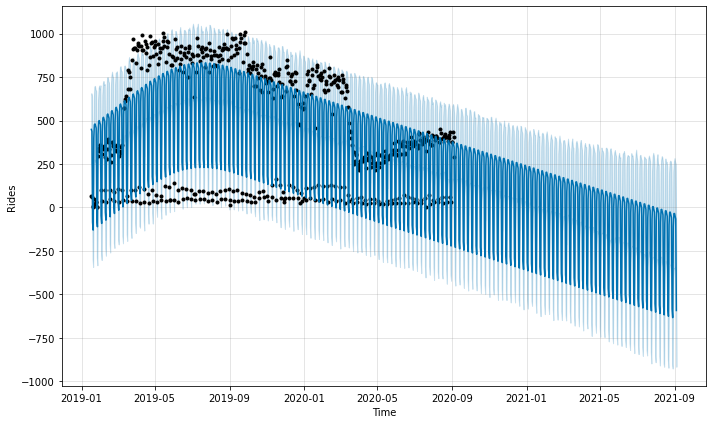

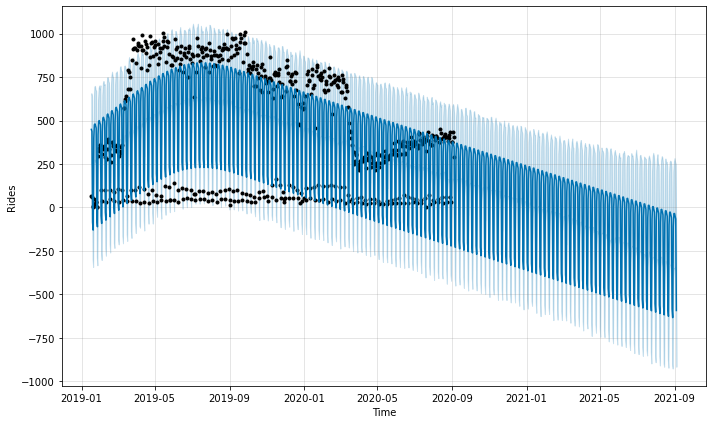

In [56]:
withcovid.plot(forecast_rides,xlabel='Time',
                             ylabel='Rides')

Text(0.5, 1.05, 'Ridership Predictions With COVID-19 Dropoff')

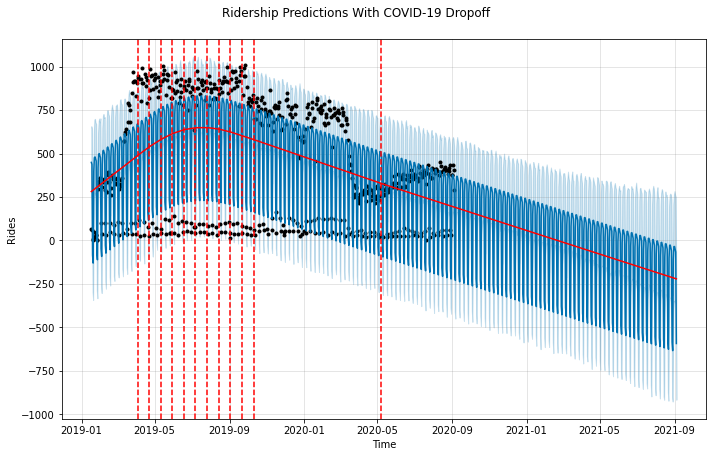

In [57]:
from fbprophet.plot import add_changepoints_to_plot
fig_rides=withcovid.plot(forecast_rides,xlabel='Time',
                             ylabel='Rides')
a=add_changepoints_to_plot(fig_rides.gca(),withcovid,forecast_rides)
fig_rides.suptitle("Ridership Predictions With COVID-19 Dropoff",y=1.05)

In [28]:
trying=dart.groupby(pd.Grouper(key='requestedPickupTs',freq='d')).count()
trying=trying[['requestedDropoffTs']]
trying=trying.loc['2019-01-17':'2020-01-10']
trying=trying.reset_index(drop=False)
trying = trying.rename(columns={'requestedPickupTs': 'ds', 'requestedDropoffTs': 'y'})

In [29]:
model_rides=Prophet()
model_rides.fit(trying)
future_rides=model_rides.make_future_dataframe(periods=365, freq='d')
forecast_rides=model_rides.predict(future_rides)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.05, 'Ridership Predictions Without COVID-19 Dropoff')

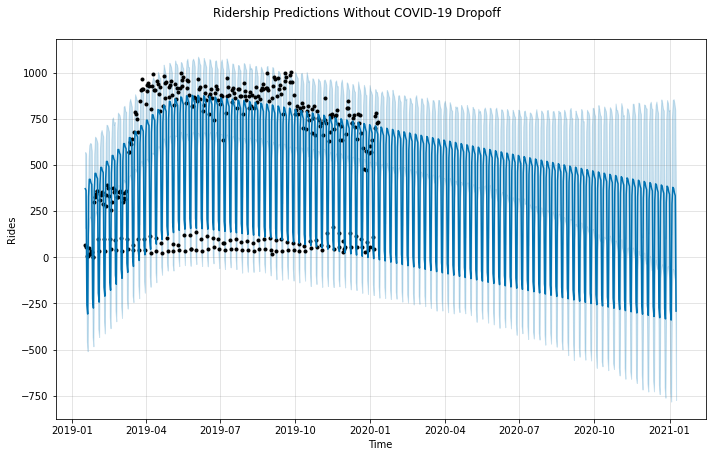

In [30]:
ax=model_rides.plot(forecast_rides,xlabel='Time',ylabel='Rides')
ax.suptitle("Ridership Predictions Without COVID-19 Dropoff",y=1.05)

Text(0.5, 1.05, 'Ridership Predictions Without COVID-19 Dropoff')

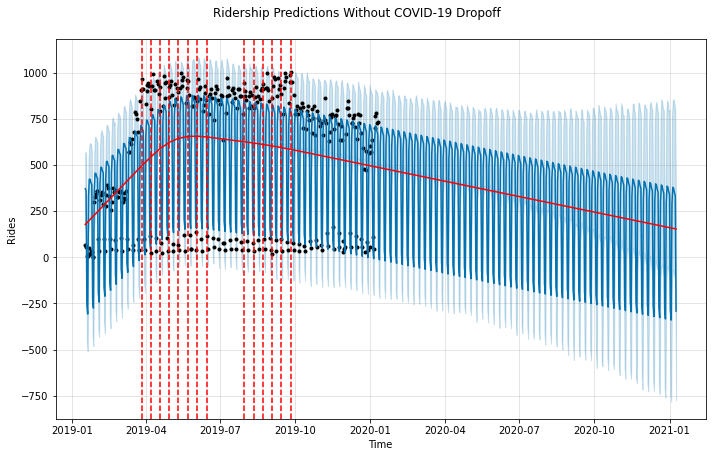

In [33]:
from fbprophet.plot import add_changepoints_to_plot
fig_rides=model_rides.plot(forecast_rides,xlabel='Time',ylabel='Rides')
a=add_changepoints_to_plot(fig_rides.gca(),model_rides,forecast_rides)
fig_rides.suptitle("Ridership Predictions Without COVID-19 Dropoff",y=1.05)

In [34]:
trying=dart.groupby(pd.Grouper(key='requestedPickupTs',freq='d')).count()
trying=trying[['requestedDropoffTs']]
trying=trying.loc['2020-03-10'::]
trying=trying.reset_index(drop=False)
trying = trying.rename(columns={'requestedPickupTs': 'ds', 'requestedDropoffTs': 'y'})

In [35]:
model_rides=Prophet()
model_rides.fit(trying)
future_rides=model_rides.make_future_dataframe(periods=365, freq='d')
forecast_rides=model_rides.predict(future_rides)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.05, 'Ridership Recovery after COVID-19')

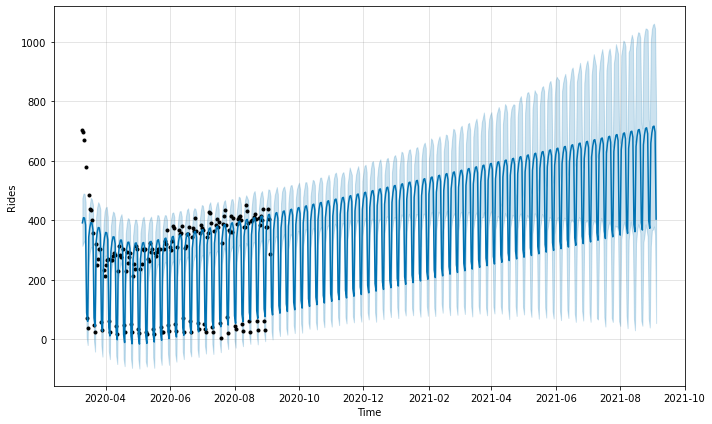

In [38]:
fig=model_rides.plot(forecast_rides,xlabel='Time',
                             ylabel='Rides')
fig_rides.suptitle("Ridership Recovery after COVID-19",y=1.05)

Text(0.5, 1.05, 'Ridership Recovery after COVID-19')

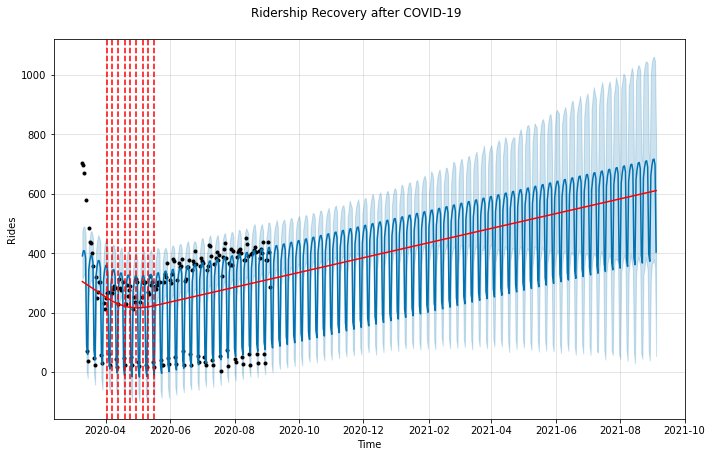

In [40]:
from fbprophet.plot import add_changepoints_to_plot
fig_rides=model_rides.plot(forecast_rides, xlabel='Time',
                             ylabel='Rides')
a=add_changepoints_to_plot(fig_rides.gca(),model_rides,forecast_rides)
fig_rides.suptitle("Ridership Recovery after COVID-19",y=1.05)

NameError: name 'fcst1' is not defined

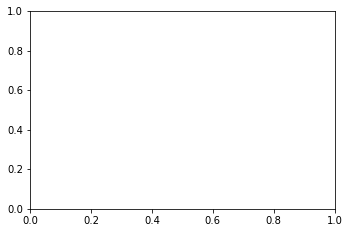

In [85]:
from matplotlib import pyplot as plt
from fbprophet.plot import plot_forecast_component, plot_yearly

fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(2, 2, 1)
plot_forecast_component(m=model_rides, fcst=fcst1, name='trend', ax=ax1)
ax1.set_title('Model 1, trend')

ax2 = fig.add_subplot(2, 2, 2)
plot_yearly(m=model_rides, ax=ax2)
ax2.set_title('Model 1, yearly seasonality')

ax3 = fig.add_subplot(2, 2, 3)
plot_forecast_component(m=withcovid, fcst=fcst2, name='trend', ax=ax3)
ax3.set_title('Model 2, trend')

ax4 = fig.add_subplot(2, 2, 4)
plot_yearly(m=withcovid, ax=ax4)
ax4.set_title('Model 2, yearly seasonality')

fig.subplots_adjust(wspace=0.3, hspace=0.3)

In [17]:
ax

NameError: name 'ax' is not defined

In [13]:
def prophet(data):
    df=data.groupby(pd.Grouper(key='requestedPickupTs',freq='d')).count()
    df=pd.DataFrame(df['requestedDropoffTs'])
    df=df.reset_index(drop=False)
    df = df.rename(columns={'requestedPickupTs': 'ds', 'requestedDropoffTs': 'y'})

    ride_model = Prophet(interval_width=0.95,yearly_seasonality=True)
    ride_model.fit(df)

    ride_forecast = ride_model.make_future_dataframe(periods=700, freq='d')
    ride_forecast = ride_model.predict(ride_forecast)

    plt.figure(figsize=(18, 6))
    ride_model.plot(ride_forecast, xlabel = 'Date', ylabel = 'Rides')
    plt.title('Ride Demand');
    ride_model.plot_components(ride_forecast);

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

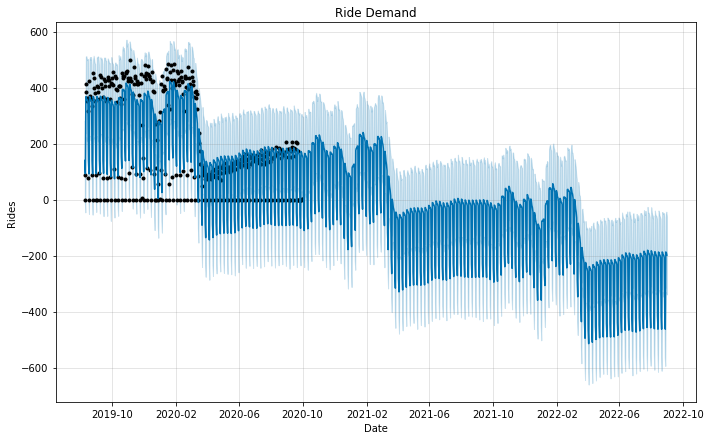

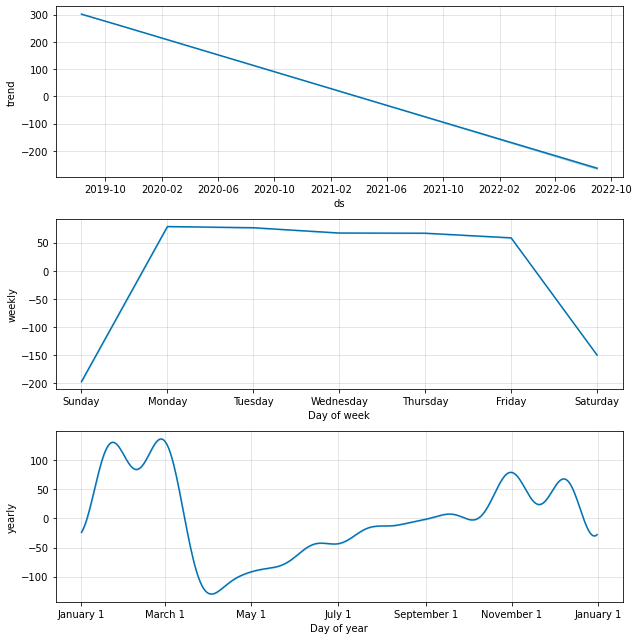

In [14]:
prophet(swtran)

In [19]:
from sklearn.cluster import KMeans

In [16]:
clus=dart[['requestedPickupLatitude','requestedPickupLongitude']]

In [17]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(clus)
labels = db.labels_

Text(0, 0.5, 'Inertia')

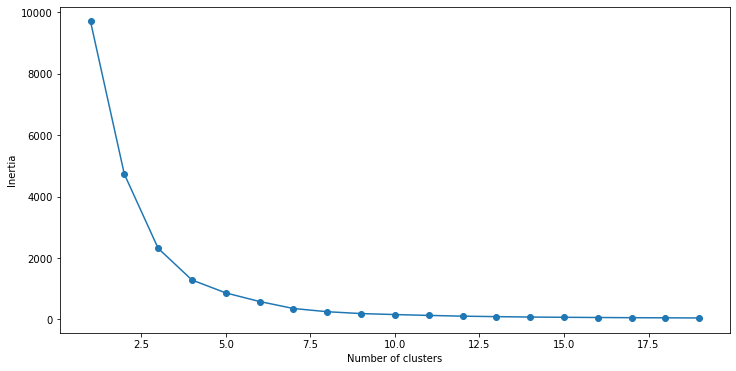

In [21]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(clus)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [22]:
import folium

In [23]:
#three clusters
kmeans = KMeans(n_clusters = 5, init='k-means++')


In [24]:
kmeans.fit(clus)

KMeans(n_clusters=5)

In [25]:
centroids=kmeans.cluster_centers_

In [26]:
centroids

array([[ 33.06233693, -96.75751791],
       [ 32.90788241, -96.54954256],
       [ 32.6992048 , -96.6497172 ],
       [ 32.88230117, -96.79073882],
       [ 32.63424113, -96.78783463]])

In [27]:
#clustering to determine areas of high demand 
centroid=centroids.tolist()

In [28]:
fig=folium.Map(location=[33.02215778131815, -96.77522957761984],zoom_start=25)
for point in range(0, len(centroid)):
    folium.Marker(centroid[point], popup = centroid[point]).add_to(fig)
fig

In [29]:
data=dart[['requestedPickupLatitude','requestedPickupLongitude']]

In [30]:
import copy

In [284]:
df=copy.copy(dart)

In [286]:
clustering_kmeans = KMeans(n_clusters=5, precompute_distances="auto",max_iter=2000)
df['clusters'] = clustering_kmeans.fit_predict(data)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)


In [288]:
df.to_csv('/Users/jacklobe/lighthouse/Final/dartclusters.csv')


In [ ]:
#now we want to make it so that we can predict when orders will come, from where and tell drivers where to wait for their next drive 

In [14]:
dartclusters=pd.read_csv('/Users/jacklobe/lighthouse/Final/dartclusters.csv')

In [15]:
dartclusters.head(5)

,Unnamed: 0,requestedPickupTs,requestedDropoffTs,requestedPickupTsTimestamp,requestedDropoffTsTimestamp,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,serviceId,status,statusChanges,travelDistance,travelDuration,endpoint,clusters
0,0,2020-04-21 17:34:19,2020-04-21 17:47:10,2020-04-21T10:34:19-07:00,2020-04-21T10:47:10-07:00,32.931741,-96.525914,32.904062,-96.564146,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,"[{""ts"": 1587490162, ""status"": ""processing""}, {...",7325,771,nextAvailable,1
1,1,2020-04-20 20:15:20,2020-04-20 20:27:54,2020-04-20T13:15:20-07:00,2020-04-20T13:27:54-07:00,32.890332,-96.531593,32.915535,-96.520184,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,"[{""ts"": 1587413560, ""status"": ""processing""}, {...",5349,754,nextAvailable,1
2,2,2020-04-22 18:50:00,2020-04-22 19:00:23,2020-04-22T11:50:00-07:00,2020-04-22T12:00:23-07:00,32.718280,-96.684454,32.670403,-96.616116,4ee9b67e-98c2-4191-a4f7-efa0b32f48c1,cancelled,"[{""ts"": 1587577965, ""status"": ""processing""}, {...",9949,623,scheduled,4
3,3,2020-04-22 11:40:35,2020-04-22 11:49:38,2020-04-22T04:40:35-07:00,2020-04-22T04:49:38-07:00,32.661913,-96.734318,32.654408,-96.801775,506997d2-b163-4b46-b977-b47f8fb0c4ff,cancelled,"[{""ts"": 1587554479, ""status"": ""processing""}, {...",9305,543,nextAvailable,2
4,4,2019-08-07 11:48:47,2019-08-07 11:59:16,2019-08-07T04:48:47-07:00,2019-08-07T04:59:16-07:00,33.073095,-96.726008,33.033556,-96.701109,e40490b6-1d87-4dec-8b23-92632915008e,completed,"[{""ts"": 1565177897, ""status"": ""processing""}, {...",7198,629,nextAvailable,3


In [60]:
from pandas import json_normalize
import ast

In [61]:
def only_dict(d):
    '''
    Convert json string representation of dictionary to a python dict
    '''
    return ast.literal_eval(d)

def list_of_dicts(ld):
    '''
    Create a mapping of the tuples formed after 
    converting json strings of list to a python list   
    '''
    return dict([(list(d.values())[1], list(d.values())[0]) for d in ast.literal_eval(ld)])

In [62]:
B=json_normalize(dartclusters['statusChanges'].apply(list_of_dicts).tolist())
dartclusters=dartclusters.join(B)

In [63]:
jaja=list(B)

In [64]:
for i in jaja:
    dartclusters[i] = pd.DatetimeIndex(pd.to_datetime(dartclusters[i],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)

In [66]:
dartclusters.drop(dartclusters.columns[dartclusters.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [69]:
dartclusters.groupby(dartclusters.serviceId).count()

,requestedPickupTs,requestedDropoffTs,requestedPickupTsTimestamp,requestedDropoffTsTimestamp,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,status,statusChanges,...,endpoint,clusters,processing,accepted,arriving,inProgress,completed,cancelled,noDriversAvailable,serviceDisruption
serviceId,,,,,,,,,,,,,,,,,,,,,
18729138-53f3-48f6-81cf-adfcc2b3d6be,171,171,171,171,171,171,171,171,171,171,...,171,171,171,170,101,154,154,16,1,0
18cc8c1d-7938-4e73-8a16-3a5f58c0cf95,7330,7330,7330,7330,7330,7330,7330,7330,7330,7330,...,7330,7330,7330,7279,2769,6208,6144,1144,54,18
1e995f05-cd00-4f9c-86a7-84e8867ee42d,10920,10920,10920,10920,10920,10920,10920,10920,10920,10920,...,10920,10920,10920,10631,6066,8244,8189,2443,297,18
4ee9b67e-98c2-4191-a4f7-efa0b32f48c1,23227,23227,23227,23227,23227,23227,23227,23227,23227,23227,...,23227,23227,23227,22492,10715,17788,17641,4903,749,32
506997d2-b163-4b46-b977-b47f8fb0c4ff,29259,29259,29259,29259,29259,29259,29259,29259,29259,29259,...,29259,29259,29259,27375,10796,22900,22735,4653,1894,16
671bf16c-0ff1-4841-9795-1644d57bd56c,14924,14924,14924,14924,14924,14924,14924,14924,14924,14924,...,14924,14924,14924,14570,6177,11465,11374,3208,370,42
7203bc39-30c4-4026-bc14-202d8aeb9503,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707,...,2707,2707,2707,2686,1062,2234,2223,470,22,9
763b99ff-73bd-4821-a7bf-5617c267dca9,9433,9433,9433,9433,9433,9433,9433,9433,9433,9433,...,9433,9433,9433,9377,4245,7516,7480,1901,60,50
907a17e6-9da5-4c47-9044-24b7a7c00b4d,14631,14631,14631,14631,14631,14631,14631,14631,14631,14631,...,14631,14631,14631,14382,5426,11659,11623,2762,257,30


In [10]:
for i in rueter.serviceId.unique():
    print(i)

8f761ac5-e6bb-401b-8fd5-fcf89cc2ca2b
9fef7962-b420-43aa-a09b-c51d110e45f5
44647f78-f78d-45e9-b19e-14ac0bf2594a
6b29446d-6d4e-4a3f-9247-afbda5a4d820
9a33fd1c-3f06-4bad-a599-a89ff33e85d7


In [11]:
geo=rueter.loc[rueter.serviceId=='8f761ac5-e6bb-401b-8fd5-fcf89cc2ca2b']

In [16]:
#converts reuter data to Oslo time 
geo['requestedPickupTs'] = pd.DatetimeIndex(pd.to_datetime(geo['requestedPickupTs'],unit='s')).tz_localize('UTC').tz_convert('Europe/Oslo')
geo['requestedDropoffTs'] = pd.DatetimeIndex(pd.to_datetime(geo['requestedDropoffTs'],unit='s')).tz_localize('UTC').tz_convert('Europe/Oslo')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
geo.groupby(geo.requestedPickupTs.hour).count()

AttributeError: 'Series' object has no attribute 'hour'

In [21]:
geo.groupby(geo.requestedPickupTs.dt.time).count()

,requestedPickupTs,requestedDropoffTs,requestedPickupTsTimestamp,requestedDropoffTsTimestamp,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,serviceId,status,statusChanges,travelDistance,travelDuration,endpoint
requestedPickupTs,,,,,,,,,,,,,,
10:00:00,56,56,56,56,56,56,56,56,56,56,56,56,56,56
10:00:04,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10:00:07,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10:00:09,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10:00:17,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17:40:00,4,4,4,4,4,4,4,4,4,4,4,4,4,4
17:40:27,1,1,1,1,1,1,1,1,1,1,1,1,1,1
17:42:41,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [47]:
trying=geo.groupby(pd.Grouper(key='requestedPickupTs',freq='d')).count()

In [116]:
trying=trying[['requestedDropoffTs']]

In [117]:
trying

,requestedDropoffTs
requestedPickupTs,
2019-01-17 00:00:00-06:00,69
2019-01-18 00:00:00-06:00,57
2019-01-19 00:00:00-06:00,5
2019-01-20 00:00:00-06:00,12
2019-01-21 00:00:00-06:00,52
...,...
2020-08-31 00:00:00-05:00,385
2020-09-01 00:00:00-05:00,384
2020-09-02 00:00:00-05:00,446


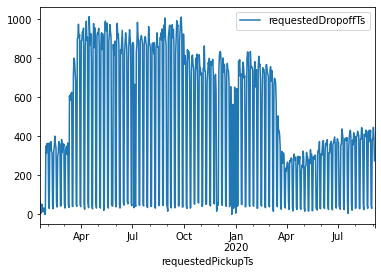

In [97]:
trying.plot()
plt.show()

In [121]:
X = trying.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    #fail to regject so it is not stationary 

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [118]:
trying=trying.loc['2019-01-17':'2020-01-10']

In [119]:
trying=trying.reset_index(drop=False)

In [120]:
trying

,requestedPickupTs,requestedDropoffTs
0,2019-01-17 00:00:00-06:00,69
1,2019-01-18 00:00:00-06:00,57
2,2019-01-19 00:00:00-06:00,5
3,2019-01-20 00:00:00-06:00,12
4,2019-01-21 00:00:00-06:00,52
...,...,...
354,2020-01-06 00:00:00-06:00,786
355,2020-01-07 00:00:00-06:00,768
356,2020-01-08 00:00:00-06:00,793
357,2020-01-09 00:00:00-06:00,708


<Figure size 1296x432 with 0 Axes>

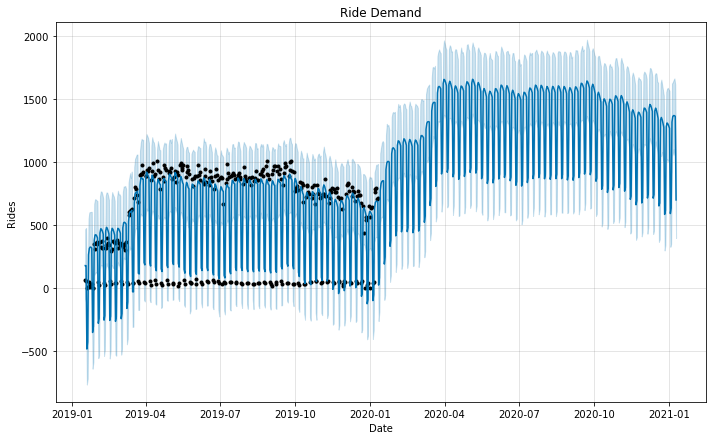

In [123]:
#filtering out covid
trying = trying.rename(columns={'requestedPickupTs': 'ds', 'requestedDropoffTs': 'y'})

ride_model = Prophet(interval_width=0.95,yearly_seasonality=True)
ride_model.fit(trying)

ride_forecast = ride_model.make_future_dataframe(periods=365, freq='D')
ride_forecast = ride_model.predict(ride_forecast)

plt.figure(figsize=(18, 6))
ride_model.plot(ride_forecast, xlabel = 'Date', ylabel = 'Rides')
plt.title('Ride Demand');

In [217]:
trying = trying.rename(columns={'requestedPickupTs': 'ds', 'requestedDropoffTs': 'y'})


<Figure size 1296x432 with 0 Axes>

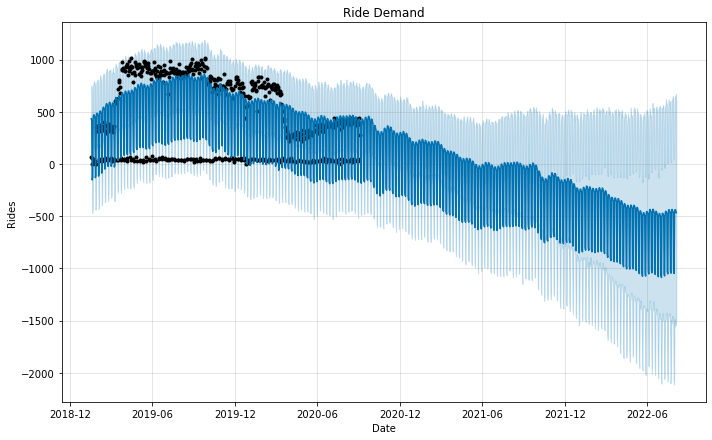

In [103]:
trying = trying.rename(columns={'requestedPickupTs': 'ds', 'requestedDropoffTs': 'y'})
trying['ds'] = trying['ds'].dt.tz_convert(None)
ride_model = Prophet(interval_width=0.95,yearly_seasonality=True)
ride_model.fit(trying)

ride_forecast = ride_model.make_future_dataframe(periods=700, freq='D')
ride_forecast = ride_model.predict(ride_forecast)

plt.figure(figsize=(18, 6))
ride_model.plot(ride_forecast, xlabel = 'Date', ylabel = 'Rides')
plt.title('Ride Demand');

In [81]:
def convertcentral(data):
    #converts central timezones to pandas datetime and converts it to central time
    data['requestedPickupTs'] = pd.DatetimeIndex(pd.to_datetime(data['requestedPickupTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central')
    data['requestedDropoffTs'] = pd.DatetimeIndex(pd.to_datetime(data['requestedDropoffTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central')
    return data

In [114]:
trying=dart.groupby(pd.Grouper(key='requestedPickupTs',freq='d')).count()

In [70]:
dart

,requestedPickupTs,requestedDropoffTs,requestedPickupTsTimestamp,requestedDropoffTsTimestamp,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,serviceId,status,statusChanges,travelDistance,travelDuration,endpoint
0,2020-04-21 17:34:19,2020-04-21 17:47:10,2020-04-21T10:34:19-07:00,2020-04-21T10:47:10-07:00,32.931741,-96.525914,32.904062,-96.564146,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,"[{""ts"": 1587490162, ""status"": ""processing""}, {...",7325,771,nextAvailable
1,2020-04-20 20:15:20,2020-04-20 20:27:54,2020-04-20T13:15:20-07:00,2020-04-20T13:27:54-07:00,32.890332,-96.531593,32.915535,-96.520184,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,"[{""ts"": 1587413560, ""status"": ""processing""}, {...",5349,754,nextAvailable
2,2020-04-22 18:50:00,2020-04-22 19:00:23,2020-04-22T11:50:00-07:00,2020-04-22T12:00:23-07:00,32.718280,-96.684454,32.670403,-96.616116,4ee9b67e-98c2-4191-a4f7-efa0b32f48c1,cancelled,"[{""ts"": 1587577965, ""status"": ""processing""}, {...",9949,623,scheduled
3,2020-04-22 11:40:35,2020-04-22 11:49:38,2020-04-22T04:40:35-07:00,2020-04-22T04:49:38-07:00,32.661913,-96.734318,32.654408,-96.801775,506997d2-b163-4b46-b977-b47f8fb0c4ff,cancelled,"[{""ts"": 1587554479, ""status"": ""processing""}, {...",9305,543,nextAvailable
4,2019-08-07 11:48:47,2019-08-07 11:59:16,2019-08-07T04:48:47-07:00,2019-08-07T04:59:16-07:00,33.073095,-96.726008,33.033556,-96.701109,e40490b6-1d87-4dec-8b23-92632915008e,completed,"[{""ts"": 1565177897, ""status"": ""processing""}, {...",7198,629,nextAvailable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272039,2020-04-21 17:29:32,2020-04-21 17:35:41,2020-04-21T10:29:32-07:00,2020-04-21T10:35:41-07:00,33.047400,-96.710740,33.033573,-96.701112,e40490b6-1d87-4dec-8b23-92632915008e,completed,"[{""ts"": 1587489917, ""status"": ""processing""}, {...",3224,369,nextAvailable
272040,2019-08-28 10:20:10,2019-08-28 10:31:08,2019-08-28T03:20:10-07:00,2019-08-28T03:31:08-07:00,32.660572,-96.624212,32.718598,-96.685063,4ee9b67e-98c2-4191-a4f7-efa0b32f48c1,completed,"[{""ts"": 1566746967, ""status"": ""processing""}, {...",12887,658,scheduled
272041,2019-08-05 17:44:49,2019-08-05 17:49:00,2019-08-05T10:44:49-07:00,2019-08-05T10:49:00-07:00,32.869173,-96.772825,32.883305,-96.764925,671bf16c-0ff1-4841-9795-1644d57bd56c,cancelled,"[{""ts"": 1565026322, ""status"": ""processing""}, {...",2129,251,nextAvailable
272042,2019-09-23 10:00:00,2019-09-23 10:08:18,2019-09-23T03:00:00-07:00,2019-09-23T03:08:18-07:00,32.661913,-96.734318,32.654408,-96.801775,506997d2-b163-4b46-b977-b47f8fb0c4ff,completed,"[{""ts"": 1569230952, ""status"": ""processing""}, {...",9305,498,scheduled
